In [80]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv('/home/arctan/data/justice_data/sample.csv', parse_dates=['date_of_filing', 'date_of_decision'])

# perform exploratory data analysis
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ddl_case_id          100000 non-null  object        
 1   date_of_filing       100000 non-null  datetime64[ns]
 2   date_of_decision     100000 non-null  datetime64[ns]
 3   filing_year          100000 non-null  int64         
 4   state_code           100000 non-null  int64         
 5   court_no             100000 non-null  int64         
 6   female_defendant     100000 non-null  object        
 7   female_petitioner    100000 non-null  object        
 8   female_judge         100000 non-null  object        
 9   judge_tenure         100000 non-null  int64         
 10  act_s                100000 non-null  object        
 11  section_s            100000 non-null  object        
 12  bailable_ipc         59239 non-null   object        
 13  number_sections

In [82]:
# print(df.head())


# Check unique values for categorical columns
print("Dispositions:", df['disposition'].unique())
print("Bailable IPC:", df['bailable_ipc'].unique())

Dispositions: ['judgement' 'disposed' 'referred to lok adalat' 'confession' 'dismissed'
 'allowed' 'plead guilty' 'convicted' 'decided' 'acquitted' 'committed'
 'disposed-otherwise' 'settled' 'absconded' 'fine' 'other' 'otherwise'
 'bail granted' 'reject' 'withdrawn' 'abated' 'compromise' 'transferred'
 'disposal in lok adalat' 'closed' 'not press' 'cancelled' 'procedural'
 'probation' 'disposition var missing' 'contest-allowed' 'appeal accepted'
 'bail rejected' 'compounded' 'remanded' 'plea bargaining' 'bail refused'
 'untrace' '258 crpc' 'award' 'quash' 'prison' 'ex-parte' 'execution'
 'p.o. consign' 'sine die' 'partly decreed' 'stayed' 'converted' 'died'
 'uncontested' 'bail order']
Bailable IPC: [nan 'bailable' 'non-bailable' 'depends' 'not applicable to section'
 'unclear, need to check']


In [83]:
print(df["female_defendant"].unique())
print(df["female_petitioner"].unique())
print(df["female_judge"].unique())
# Check for missing values
print("Missing values:\n", df.isnull().sum())

['-9998 unclear' '0 male' '1 female' '-9999 missing name']
['0 male' '-9998 unclear' '1 female' '-9999 missing name']
['-9998 unclear' '0 nonfemale' '1 female']
Missing values:
 ddl_case_id                0
date_of_filing             0
date_of_decision           0
filing_year                0
state_code                 0
court_no                   0
female_defendant           0
female_petitioner          0
female_judge               0
judge_tenure               0
act_s                      0
section_s                  0
bailable_ipc           40761
number_sections_ipc    40529
disposition                0
dtype: int64


In [84]:
valid_genders = ['0 male', '1 female']
mapping = {"0 male": 0, "1 female": 1}

df_clean = df[
    df["female_defendant"].isin(valid_genders) &
    df["female_petitioner"].isin(valid_genders)
].copy() 
df_clean.info()
df_clean.loc[:, "female_defendant"] = df_clean["female_defendant"].map(mapping)
df_clean.loc[:, "female_petitioner"] = df_clean["female_petitioner"].map(mapping)


valid_genders = ['0 nonfemale', '1 female']
mapping = {"0 nonfemale": 0, "1 female": 1}

df_clean = df_clean[df_clean["female_judge"].isin(valid_genders)]
df_clean.loc[:, "female_judge"] = df_clean["female_judge"].map(mapping)

<class 'pandas.core.frame.DataFrame'>
Index: 17606 entries, 8 to 99995
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ddl_case_id          17606 non-null  object        
 1   date_of_filing       17606 non-null  datetime64[ns]
 2   date_of_decision     17606 non-null  datetime64[ns]
 3   filing_year          17606 non-null  int64         
 4   state_code           17606 non-null  int64         
 5   court_no             17606 non-null  int64         
 6   female_defendant     17606 non-null  object        
 7   female_petitioner    17606 non-null  object        
 8   female_judge         17606 non-null  object        
 9   judge_tenure         17606 non-null  int64         
 10  act_s                17606 non-null  object        
 11  section_s            17606 non-null  object        
 12  bailable_ipc         5981 non-null   object        
 13  number_sections_ipc  6054 non-null  

In [85]:
# Create same-gender indicator (1 = judge/defendant same gender)
df_clean['same_gender'] = (df_clean['female_judge'] == df_clean['female_defendant']).astype(int)


df_clean['duration'] = (df_clean['date_of_decision'] - df_clean['date_of_filing']).dt.days
df_clean["judge_tenure"] = -df_clean["judge_tenure"]
favorable_outcomes = [
    "fine",
    "compromise",
    "award",
    "plead guilty",
    "plea bargaining",
    "settled",
    "allowed",
    "converted",
    "disposed",
    "disposed-otherwise",
    "referred to lok adalat",
    "disposal in lok adalat",
    "partly decreed",
    "uncontested",
    "withdrawn",
    "acquitted",
    "bail granted",
    "probation",
    "contest-allowed",
    "appeal accepted",
    "decided",
]

# Simplify disposition to binary (1 = acquitted)
df_clean['favorable'] = df_clean['disposition'].apply(lambda x: 1 if (x == "decided") else 0)



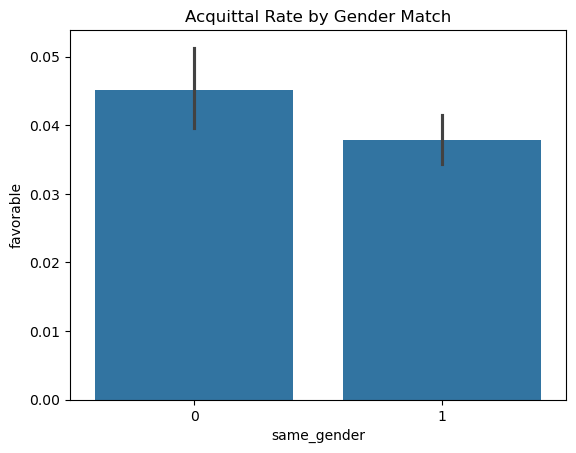

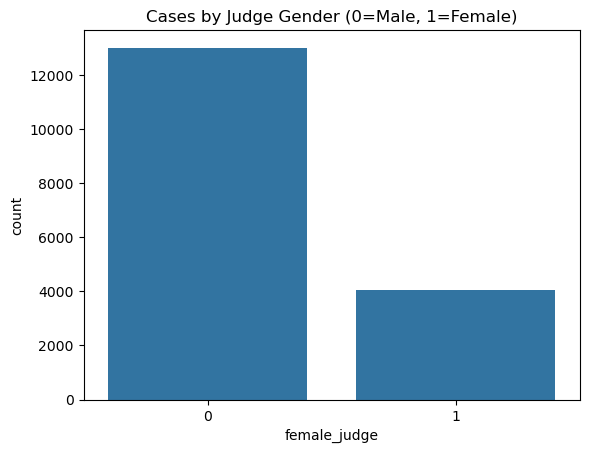

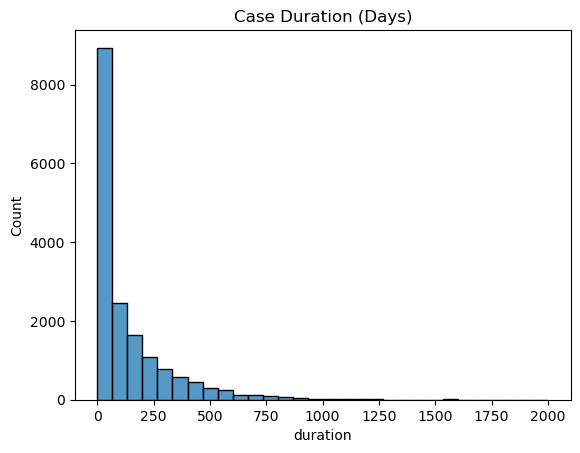

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns
# Acquittal rate by gender match
sns.barplot(x='same_gender', y='favorable', data=df_clean)
plt.title("Acquittal Rate by Gender Match")
plt.show()

# Distribution of cases by judge gender
sns.countplot(x='female_judge', data=df_clean)
plt.title("Cases by Judge Gender (0=Male, 1=Female)")
plt.show()

# Case duration distribution
sns.histplot(df_clean['duration'], bins=30)
plt.title("Case Duration (Days)")
plt.show()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ddl_case_id          100000 non-null  object        
 1   date_of_filing       100000 non-null  datetime64[ns]
 2   date_of_decision     100000 non-null  datetime64[ns]
 3   filing_year          100000 non-null  int64         
 4   state_code           100000 non-null  int64         
 5   court_no             100000 non-null  int64         
 6   female_defendant     100000 non-null  object        
 7   female_petitioner    100000 non-null  object        
 8   female_judge         100000 non-null  object        
 9   judge_tenure         100000 non-null  int64         
 10  act_s                100000 non-null  object        
 11  section_s            100000 non-null  object        
 12  bailable_ipc         59239 non-null   object        
 13  number_sections

In [88]:
import scipy.stats as stats

# Calculate Pearson correlation
r, p = stats.pearsonr(df_clean['judge_tenure'], df_clean['duration'])
print(f"Correlation: {r:.2f}, p-value: {p:.4f}")

Correlation: 0.34, p-value: 0.0000


In [89]:
df_clean_clean = df_clean.dropna(subset=['number_sections_ipc'])
df_clean_clean = df_clean_clean.dropna(subset=['bailable_ipc'])
r, p = stats.pearsonr(df_clean_clean['number_sections_ipc'], df_clean_clean['duration'])
print(f"Correlation: {r:.2f}, p-value: {p:.4f}")


Correlation: -0.04, p-value: 0.0006


In [90]:
import statsmodels.api as sm

# Model case duration as a function of tenure, sections, and bailability
model = sm.OLS(
    df_clean_clean['duration'], 
    sm.add_constant(df_clean_clean[['judge_tenure', 'number_sections_ipc']])
)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     434.9
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          7.61e-177
Time:                        22:43:26   Log-Likelihood:                -39080.
No. Observations:                5863   AIC:                         7.817e+04
Df Residuals:                    5860   BIC:                         7.819e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  31.0966    

In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17054 entries, 8 to 99995
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ddl_case_id          17054 non-null  object        
 1   date_of_filing       17054 non-null  datetime64[ns]
 2   date_of_decision     17054 non-null  datetime64[ns]
 3   filing_year          17054 non-null  int64         
 4   state_code           17054 non-null  int64         
 5   court_no             17054 non-null  int64         
 6   female_defendant     17054 non-null  object        
 7   female_petitioner    17054 non-null  object        
 8   female_judge         17054 non-null  object        
 9   judge_tenure         17054 non-null  int64         
 10  act_s                17054 non-null  object        
 11  section_s            17054 non-null  object        
 12  bailable_ipc         5863 non-null   object        
 13  number_sections_ipc  5936 non-null  

In [92]:
df_clean["favorable"].unique()

array([0, 1])

In [93]:
# Model likelihood of favorable outcome
# model = sm.Logit(
#     df_clean_clean['favorable'], 
#     sm.add_constant(df_clean_clean[['female_judge', 'female_defendant', 'judge_tenure']])
# )
# results = model.fit()
# print(results.summary())

import statsmodels.formula.api as smf

# Logistic regression for acquittal probability
# Rerun the model with cleaned data
model = smf.logit(
    'favorable ~ female_judge + female_defendant + judge_tenure',
    data=df_clean
).fit(maxiter=100)

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.166110
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              favorable   No. Observations:                17054
Model:                          Logit   Df Residuals:                    17050
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                 0.01184
Time:                        22:43:26   Log-Likelihood:                -2832.8
converged:                       True   LL-Null:                       -2866.8
Covariance Type:            nonrobust   LLR p-value:                 1.205e-14
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.7034      0.086    -31.293      0.000      -2.873      -2.

In [94]:
# Add control variables and interaction term
model = smf.logit(
    'favorable ~ female_judge * female_defendant + judge_tenure + act_s ',
    data=df_clean
).fit(maxiter=100)
print(model.summary())

         Current function value: 0.161003
         Iterations: 100
                           Logit Regression Results                           
Dep. Variable:              favorable   No. Observations:                17054
Model:                          Logit   Df Residuals:                    17016
Method:                           MLE   Df Model:                           37
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                 0.04222
Time:                        22:43:31   Log-Likelihood:                -2745.7
converged:                      False   LL-Null:                       -2866.8
Covariance Type:            nonrobust   LLR p-value:                 5.970e-32
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                            

/usr/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
# Count how many cases per act
act_counts = df_clean['act_s'].value_counts()
# print(act_counts)

# Keep only acts with at least 2 cases
valid_acts = act_counts[act_counts >= 2].index.tolist()

# Now run ANOVA only on these
f_val, p_val = stats.f_oneway(
    *[df_clean[df_clean['act_s'] == act]['duration'] for act in valid_acts]
)

print(f"F-statistic: {f_val:.2f}, p-value: {p_val:.4f}")


F-statistic: 27.90, p-value: 0.0000


In [96]:
import statsmodels.formula.api as smf

model = smf.ols(
    'duration ~ C(act_s) + C(filing_year) + C(state_code) + number_sections_ipc',
    data=df_clean
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     34.65
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          6.89e-215
Time:                        22:43:31   Log-Likelihood:                -39389.
No. Observations:                5936   AIC:                         7.885e+04
Df Residuals:                    5899   BIC:                         7.910e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------